<a id='table_of_contents'></a>

0. [Import libraries](#imports)
1. [Import data](#import_data)
2. [Data exploration](#data_exploration)
3. [Data cleaning](#data_cleaning)
4. [Data preparation](#data_preparation)
5. [Benchmark model](#benchmark_model)<br>
    5.1. [Train-test split](#train_test_split)<br>
    5.2. [Fit a model to the data](#fit_model)<br>
    5.3. [Model evaluation](#model_evaluation)<br>
    5.4. [Fix problems](#fix_problems)
6. [Feature engineering](#feature_eng)
7. [Model training](#model_training)<br>
    7.1. [Decision Tree](#decision_tree)<br>
    7.2. [Random Forest](#random_forest) -
      [Overfit](#overfit) - 
      [Underfit](#underfit)<br>
    7.3. [Gradient boosting](#gradient_boosting)<br>
    7.4. [Comparing algorithm performances](#comparing_algorithm_performances)
8. [Tuning](#tuning)<br>
    8.1. [Find best parameters](#find_best_parameters)<br>
    Bonus: [Classification](#classification)

# 0. Import libraries <a id='imports'></a>
[Back to top](#table_of_contents)

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

# 1. Import data <a id='import_data'></a>
[Back to top](#table_of_contents)

In [2]:
taxi_jan_2019 = pd.read_parquet('data/yellow_tripdata_2019-01.parquet')
taxi_data = pd.concat([taxi_jan_2019])

In [3]:
print(taxi_data.shape)
taxi_data.head()

(7696617, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,None
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,None
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,None
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,None
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,None


# 2. Data exploration <a id='data_exploration'></a>
[Back to top](#table_of_contents)

In [4]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [5]:
taxi_data = taxi_data[['tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count','trip_distance','RatecodeID','PULocationID', 'DOLocationID', 'payment_type', 'total_amount']]

In [6]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

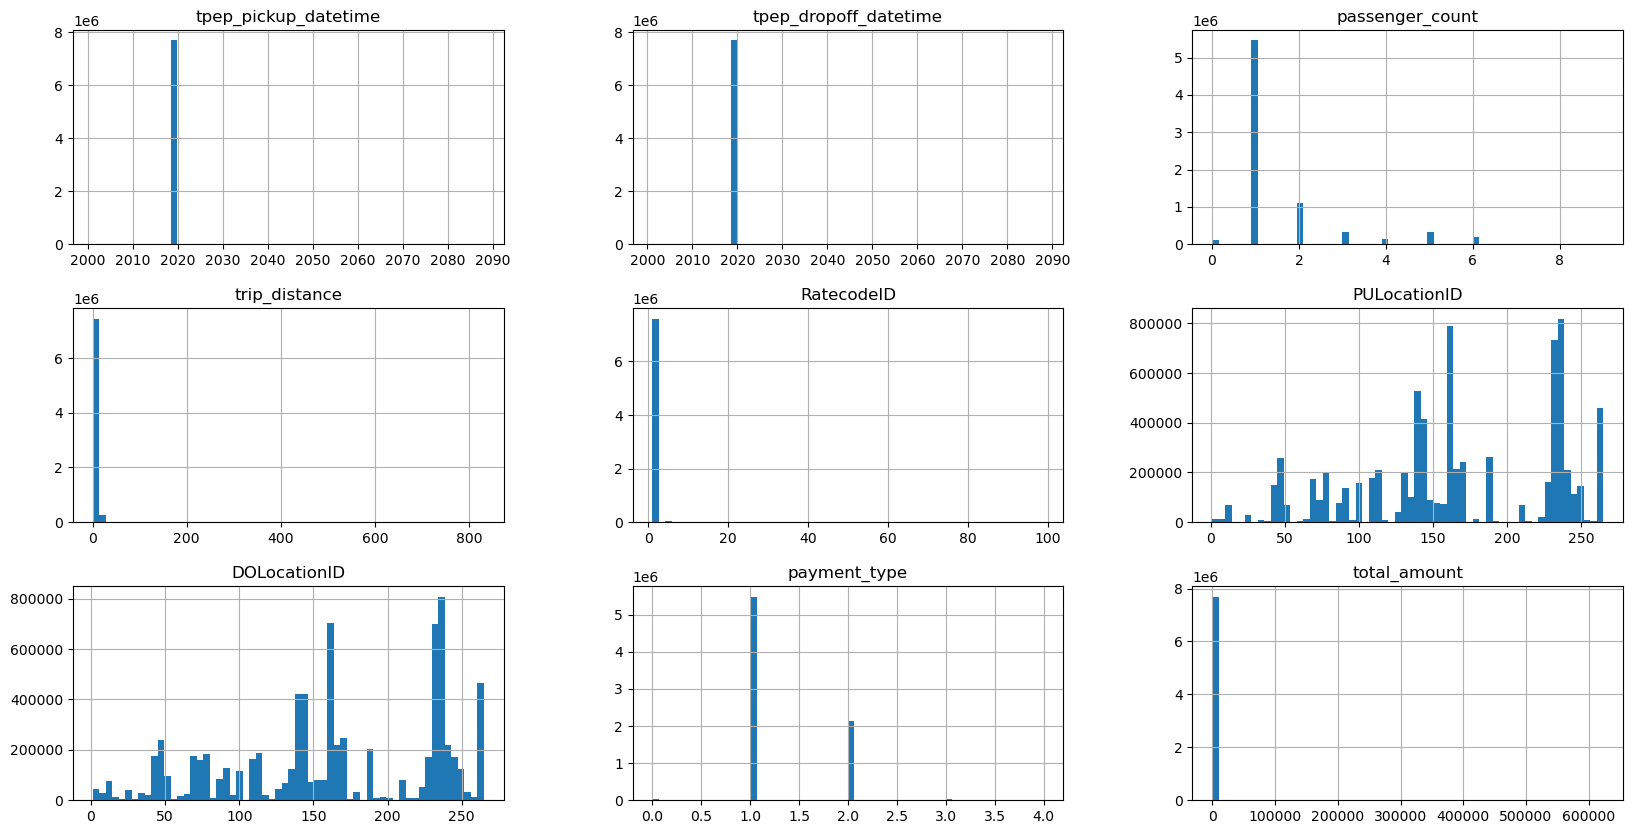

In [7]:
taxi_data.hist(figsize = (20,10), bins = 60)

In [8]:
taxi_data['RatecodeID'].value_counts()

RatecodeID
1.0     7430288
2.0      166093
5.0       54570
3.0       11801
4.0        4895
99.0        252
6.0          46
Name: count, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

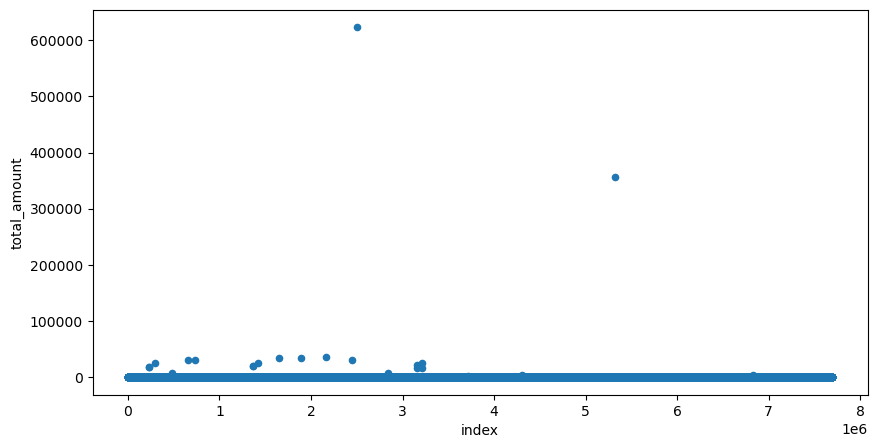

In [9]:
taxi_data.reset_index().plot(kind = 'scatter',y = 'total_amount', x = 'index', figsize = (10,5))

<Axes: xlabel='index', ylabel='total_amount'>

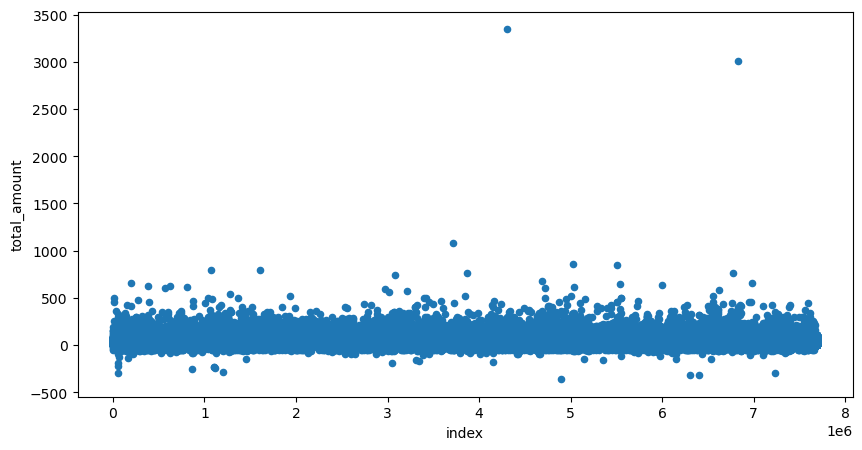

In [10]:
taxi_data[taxi_data['total_amount']<5000].reset_index().plot(kind = 'scatter',y = 'total_amount', x = 'index', figsize = (10,5))

Two things to deal with: negative values and very high values. Let's first look at negative values.

(7127, 9)


<Axes: xlabel='index', ylabel='total_amount'>

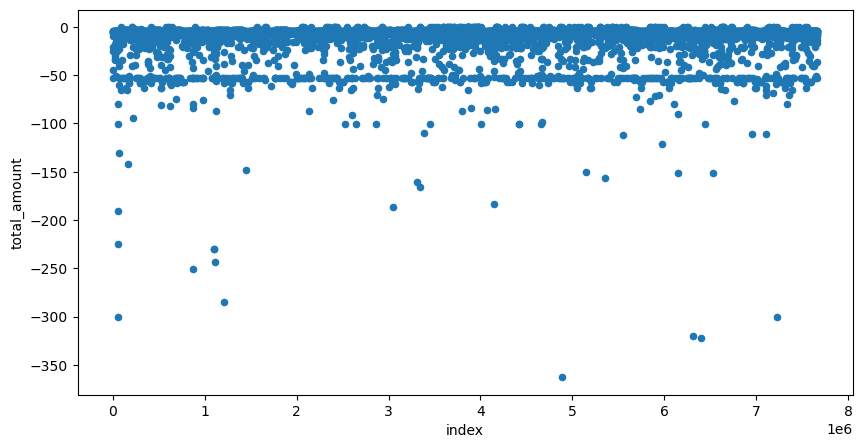

In [11]:
print(taxi_data[taxi_data['total_amount']<0].shape)
taxi_data[taxi_data['total_amount']<0].reset_index().plot(kind = 'scatter',y = 'total_amount', x = 'index', figsize = (10,5))

In [12]:
taxi_data[taxi_data['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2.0,0.10,1.0,148,148,3,-3.8
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1.0,4.13,1.0,170,238,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1.0,1.35,1.0,162,234,4,-9.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1.0,0.00,1.0,234,234,4,-3.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1.0,0.16,1.0,234,234,4,-4.3


In [13]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

payment_type
3    4083
4    2667
2     376
1       1
Name: count, dtype: int64

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

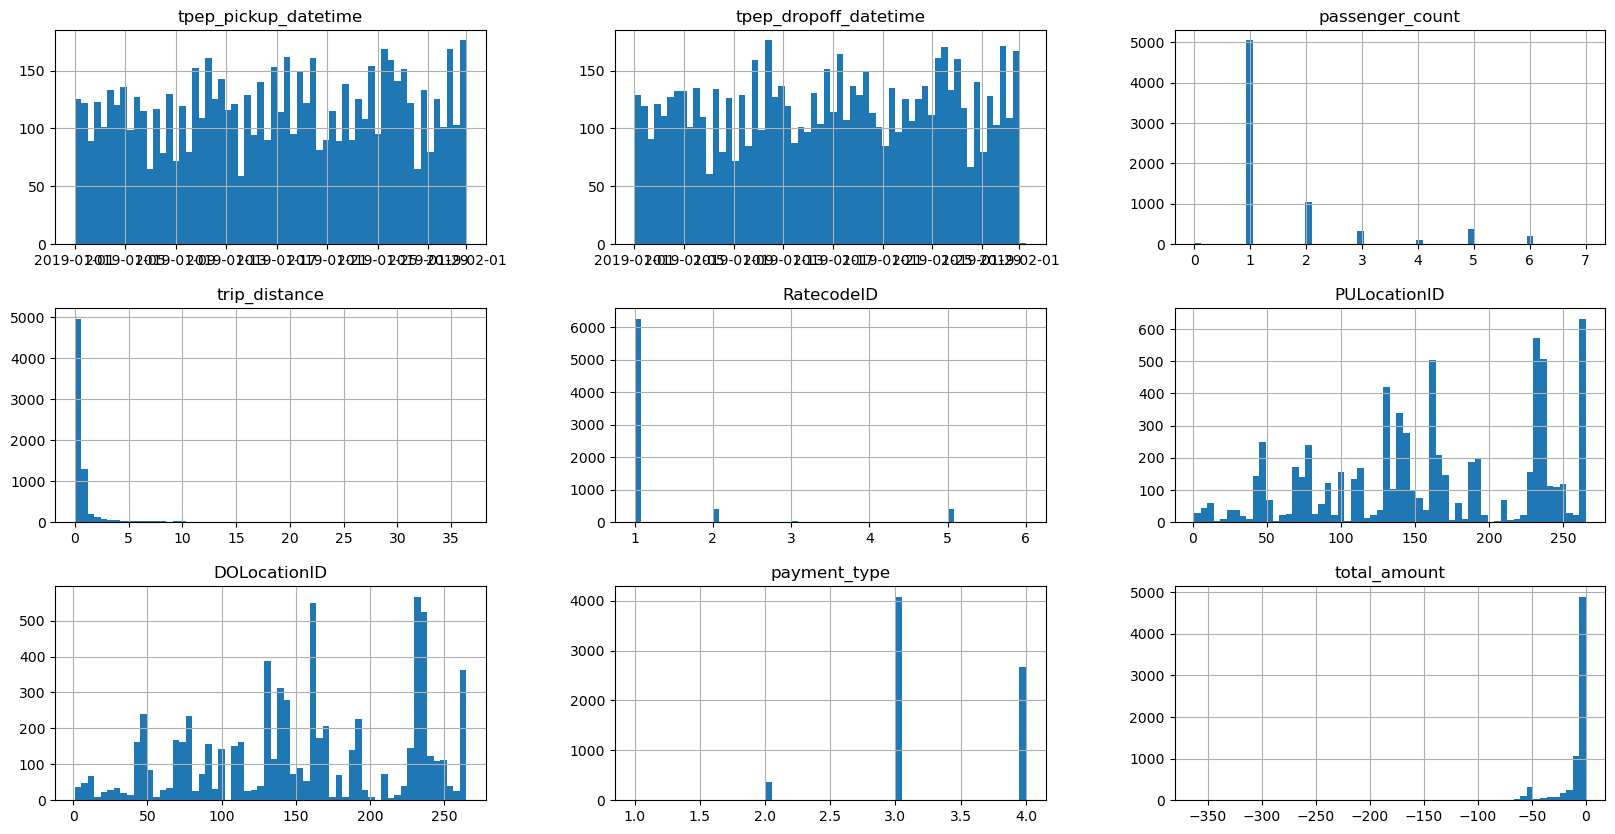

In [14]:
taxi_data[taxi_data['total_amount']<0].hist(figsize=(20,10), bins=60)

In [15]:
print(taxi_data[taxi_data['total_amount']==0].shape)
taxi_data[taxi_data['total_amount']==0].head()

(1643, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1.0,0.0,5.0,186,264,2,0.0
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1.0,0.0,5.0,246,264,2,0.0
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1.0,0.0,1.0,193,193,1,0.0
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1.0,0.0,1.0,7,7,2,0.0
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1.0,0.0,1.0,264,7,2,0.0


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

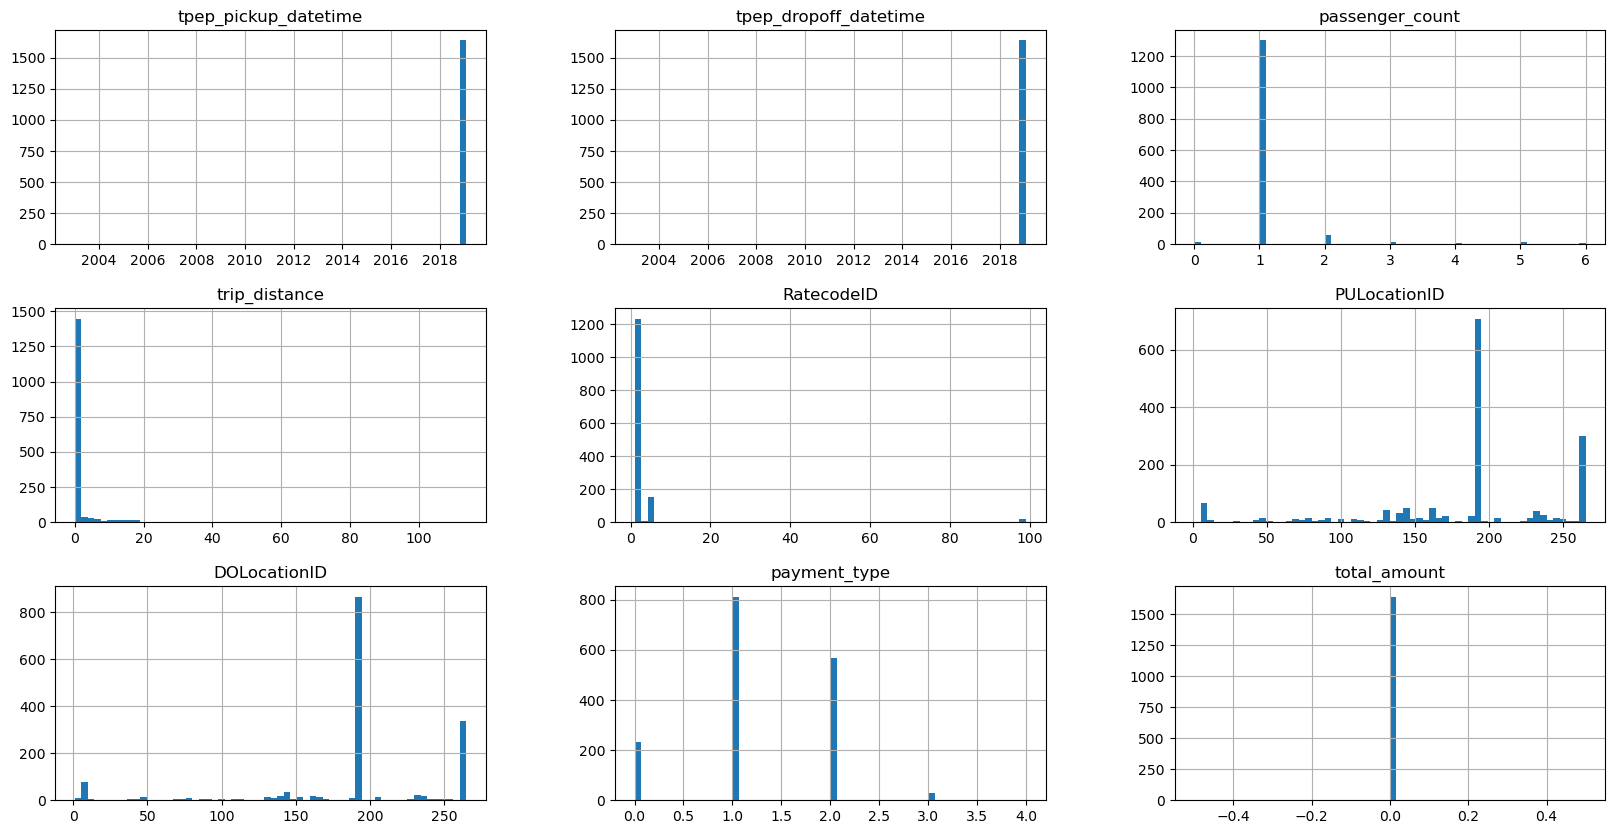

In [16]:
taxi_data[taxi_data['total_amount']==0].hist(figsize=(20,10), bins=60)

In [17]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

trip_distance
0.00     1323
0.03        9
0.01        8
0.06        6
1.00        4
         ... 
11.86       1
4.59        1
20.92       1
18.37       1
12.30       1
Name: count, Length: 256, dtype: int64

We can safely get rid of the negative values. What about the very high values?

<Axes: xlabel='index', ylabel='total_amount'>

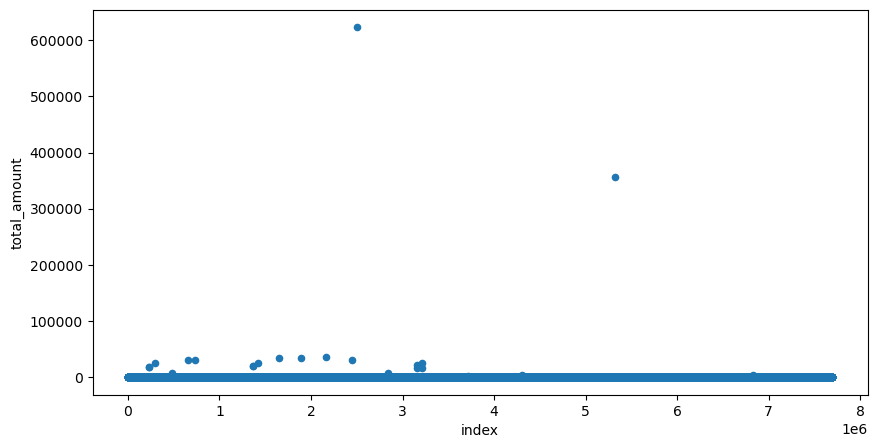

In [18]:
taxi_data.reset_index().plot(kind = 'scatter',y = 'total_amount', x = 'index', figsize = (10,5))

In [19]:
taxi_data[taxi_data['total_amount']>200].shape

(1166, 9)

In [20]:
taxi_data['total_amount'].mean()

15.810651344610214

We can agree to cut from $200 level.

# 3. Data cleaning  <a id='data_cleaning'></a>
[Back to top](#table_of_contents)

In [21]:
taxi_data_filtered = taxi_data[(taxi_data['total_amount']>0)&(taxi_data['total_amount']<=200)]

In [22]:
print(taxi_data.shape)
print(taxi_data_filtered.shape)

(7696617, 9)
(7686681, 9)


In [23]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          28441
trip_distance                0
RatecodeID               28441
PULocationID                 0
DOLocationID                 0
payment_type                 0
total_amount                 0
dtype: int64

In [24]:
taxi_data_filtered[taxi_data_filtered.isna().any(axis=1)]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
7667945,2019-01-01 00:38:45,2019-01-01 00:54:11,NaN,2.21,NaN,161,263,0,16.30
7667946,2019-01-01 01:56:58,2019-01-01 02:13:14,NaN,3.17,NaN,256,226,0,19.59
7667947,2019-01-01 01:59:06,2019-01-01 02:20:24,NaN,6.31,NaN,140,256,0,34.04
7667951,2019-01-01 04:36:00,2019-01-01 04:58:00,NaN,5.66,NaN,35,97,0,32.50
7667952,2019-01-01 04:36:54,2019-01-01 04:58:27,NaN,8.28,NaN,10,35,0,43.00
...,...,...,...,...,...,...,...,...,...
7696609,2019-01-31 23:10:00,2019-01-31 23:28:00,NaN,9.38,NaN,226,42,0,46.50
7696610,2019-01-31 23:17:00,2019-01-31 23:39:00,NaN,6.73,NaN,136,51,0,39.50
7696611,2019-01-31 23:14:00,2019-01-31 23:29:00,NaN,5.45,NaN,41,136,0,32.50
7696613,2019-01-31 23:28:00,2019-01-31 23:50:50,NaN,12.43,NaN,48,213,0,54.60


In [25]:
taxi_data_filtered.dropna(inplace=True)

C:\Users\Alfej\AppData\Local\Temp\ipykernel_12464\3386940804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_data_filtered.dropna(inplace=True)


In [26]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

# 4. Data preparation  <a id='data_preparation'></a>
[Back to top](#table_of_contents)


In [27]:
taxi_data_prepared =  taxi_data_filtered.copy()

In [28]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
total_amount                    float64
dtype: object

In [29]:
taxi_data_prepared.loc[:,'RatecodeID'] = taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared.loc[:,'PULocationID'] = taxi_data_prepared['PULocationID'].astype(str)
taxi_data_prepared.loc[:,'DOLocationID'] = taxi_data_prepared['DOLocationID'].astype(str)
taxi_data_prepared.loc[:,'payment_type'] = taxi_data_prepared['payment_type'].astype(str)

In [30]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [31]:
taxi_data_prepared['transaction_date'] = pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)
taxi_data_prepared['transaction_year'] = taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_month'] = taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_day'] = taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_hr'] = taxi_data_prepared['tpep_pickup_datetime'].dt.hour

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'transaction_date'}>],
       [<Axes: title={'center': 'transaction_year'}>,
        <Axes: title={'center': 'transaction_month'}>,
        <Axes: title={'center': 'transaction_day'}>],
       [<Axes: title={'center': 'transaction_hr'}>, <Axes: >, <Axes: >]],
      dtype=object)

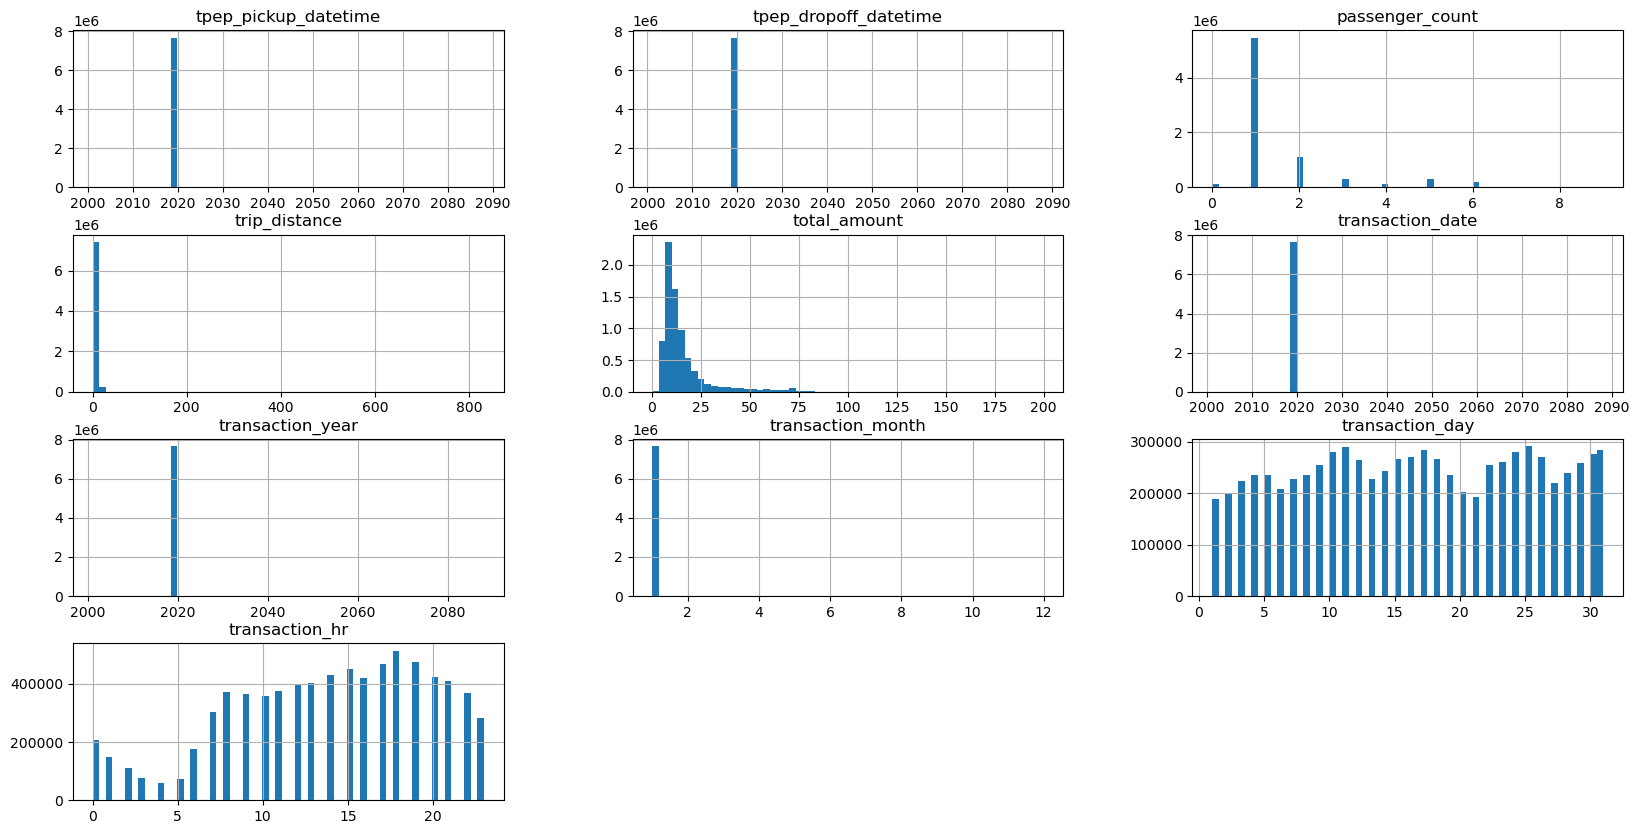

In [32]:
taxi_data_prepared.hist(figsize=(20,10),bins=60)

In [33]:
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_year']==2019]
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_month']==1]

### noting down categorical and numerical columns


In [34]:
cat_cols = ['PULocationID','transaction_date','transaction_year','transaction_month','transaction_day','transaction_hr']
val_cols = ['trip_distance','total_amount']
all_cols = cat_cols + val_cols 

In [35]:
main_df = taxi_data_prepared[all_cols]
print(main_df.shape)
main_df.head()

(7657708, 8)


,PULocationID,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hr,trip_distance,total_amount
0,151,2019-01-01,2019,1,1,0,1.5,9.95
1,239,2019-01-01,2019,1,1,0,2.6,16.30
7,163,2019-01-01,2019,1,1,0,1.3,9.05
8,229,2019-01-01,2019,1,1,0,3.7,18.50
9,141,2019-01-01,2019,1,1,0,2.1,13.00


### now as we see in the data we have multiple data point or the one instance of the time so lets aggrigate them 

In [36]:
texi_grouped_by_region_df = main_df.groupby(cat_cols).mean().reset_index()
texi_grouped_by_region_df['Count_No_Transactions'] =  main_df.groupby(cat_cols).count().reset_index()['total_amount']
print(texi_grouped_by_region_df.shape)
texi_grouped_by_region_df.head()

(102461, 9)


,PULocationID,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hr,trip_distance,total_amount,Count_No_Transactions
0,1,2019-01-01,2019,1,1,2,0.0,21.800,1
1,1,2019-01-01,2019,1,1,5,0.0,87.300,1
2,1,2019-01-01,2019,1,1,6,0.0,80.300,1
3,1,2019-01-01,2019,1,1,8,0.0,128.580,2
4,1,2019-01-01,2019,1,1,10,16.9,43.245,4


<Axes: >

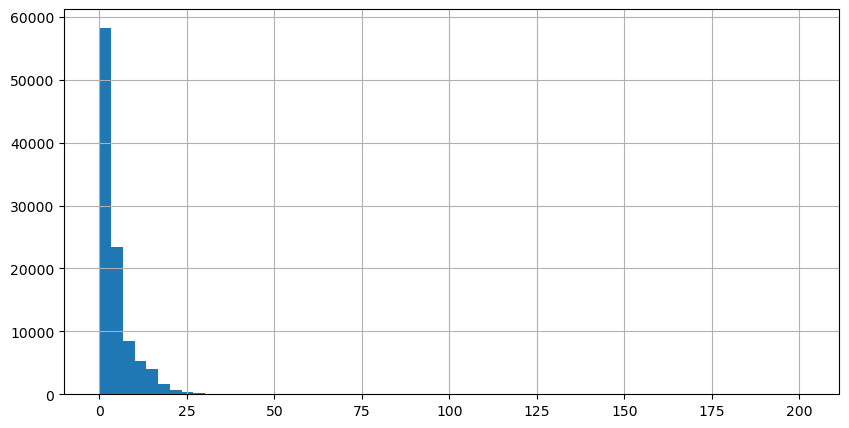

In [37]:
texi_grouped_by_region_df['trip_distance'].hist(figsize = (10,5),bins=60)

<Axes: >

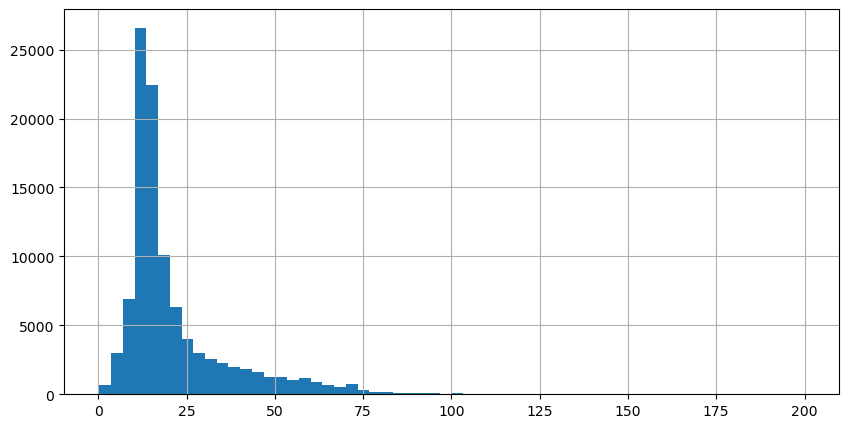

In [38]:
texi_grouped_by_region_df['total_amount'].hist(figsize = (10,5),bins=60)

# Benchmark Model <a id='benchmark_model'></a>

[.Back to top](#table_of_contents)

In [39]:
Data_for_benchmark_model = texi_grouped_by_region_df.copy()

In [40]:
Categorical_features = ['PULocationID','transaction_year','transaction_month','transaction_day']
input_features = Categorical_features + ['trip_distance']
target_features = ['total_amount']

# 5.1 Train - Test Split <a id='benchmark_model'></a>

[.Back to top](#table_of_contents)


In [41]:
from sklearn.model_selection import train_test_split

train_data =  Data_for_benchmark_model[input_features]
test_data = Data_for_benchmark_model[target_features]


train_data = pd.get_dummies(train_data)


x_train,x_test,y_train,y_test = train_test_split(train_data,test_data,test_size = 0.2, random_state = 42)

# 5.2 Train Model <a id='benchmark_model'></a>

[.Back to top](#table_of_contents)

In [42]:
from sklearn.tree import DecisionTreeRegressor

# Assuming `input_features` contains features and `target_feature` contains the target variable name
train_data = Data_for_benchmark_model[input_features]
target_data = Data_for_benchmark_model[target_features]

# Splitting the data into training and testing sets


# Checking the shapes of the training data
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print( y_train.head())

# If needed, encode categorical variables in y_train
x_train = pd.get_dummies(x_train)

x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.2, random_state=42)
# Creating and fitting the decision tree regressor model
model = DecisionTreeRegressor(max_depth=10)
model.fit(x_train, y_train)


x_train shape: (81968, 267)
y_train shape: (81968, 1)
       total_amount
39905     40.560000
24375     58.560000
32706     45.730000
41867     64.300000
16474     11.777795


DecisionTreeRegressor(max_depth=10)

# 5.3 Evaluate Model <a id='model_evaluation'></a>

[.Back to top](#table_of_contents)

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from math import sqrt

model_creatd = model
y_predict = model.predict(x_test)
print(y_predict.shape)

(20493,)


In [44]:
print('mean_absolute_error',mean_absolute_error(y_test,y_predict))
print('mean_squared_error',mean_squared_error(y_test,y_predict))
print('root_mean_squared_error',sqrt(mean_absolute_error(y_test,y_predict)))
print('r2',r2_score(y_test,y_predict))

mean_absolute_error 3.4520266991122837
mean_squared_error 68.3187251086747
root_mean_squared_error 1.8579630510621796
r2 0.7544516070663242


41557    18.800000
17831    11.504490
36515    15.383333
10154    18.976923
81634    13.061063
           ...    
75210    28.117500
15399    28.810000
59932    12.701429
8386     16.137753
44907    48.750000
Name: total_amount, Length: 20493, dtype: float64
0        22.700474
1        12.825934
2        12.825934
3        20.214292
4        11.632526
           ...    
20488    29.735573
20489    30.247335
20490    11.085297
20491    15.220957
20492    52.484964
Length: 20493, dtype: float64


<Axes: xlabel='true', ylabel='pred'>

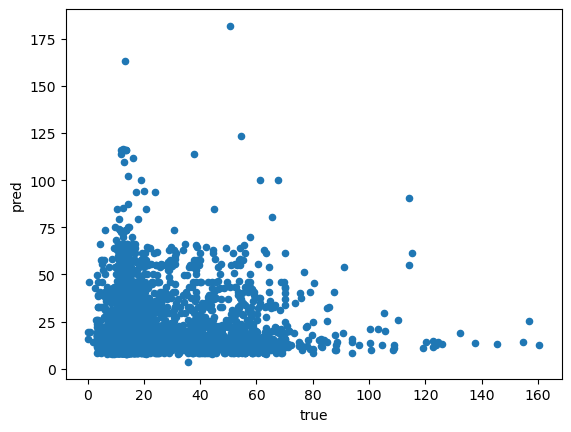

In [45]:


y_test_series = pd.Series(y_test.squeeze())
y_predict_series = pd.Series(y_predict.squeeze())

print(y_test_series)
print(y_predict_series)
data = {'true': y_test_series, 'pred': y_predict_series}
results = pd.DataFrame(data)

results.plot(kind = 'scatter', x='true', y= 'pred')

### model is not that accurate data leak is happening in this model as we have a taotal diatance in the data and we are predicting total amount so the total amount is in propotinal to total distance that means total amount will be more for more distance 

# 5.4 Fix Problems <a id='fix_problems'></a>

[.Back to top](#table_of_contents)

In [46]:
Data_for_fixing_model = texi_grouped_by_region_df.copy()

In [47]:
Categorical_features = ['PULocationID','transaction_year','transaction_month','transaction_day']
input_features = Categorical_features
target_features = ['total_amount']

In [48]:
from sklearn.model_selection import train_test_split

train_data =  Data_for_fixing_model[input_features]
test_data = Data_for_fixing_model[target_features]


train_data = pd.get_dummies(train_data)


x_train,x_test,y_train,y_test = train_test_split(train_data,test_data,test_size = 0.2, random_state = 42)

In [49]:
from sklearn.tree import DecisionTreeRegressor

# Assuming `input_features` contains features and `target_feature` contains the target variable name
# train_data = Data_for_benchmark_model[input_features]
# target_data = Data_for_benchmark_model[target_features]

# # Splitting the data into training and testing sets


# # Checking the shapes of the training data
# print("x_train shape:", x_train.shape)
# print("y_train shape:", y_train.shape)
# print( y_train.head())

# If needed, encode categorical variables in y_train
x_train = pd.get_dummies(x_train)

x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.2, random_state=42)
# Creating and fitting the decision tree regressor model
model = DecisionTreeRegressor(max_depth=10)
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [50]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from math import sqrt

model_creatd = model
y_predict = model.predict(x_test)
print(y_predict.shape)

(20493,)


In [51]:
print('mean_absolute_error',mean_absolute_error(y_test,y_predict))
print('mean_squared_error',mean_squared_error(y_test,y_predict))
print('root_mean_squared_error',sqrt(mean_absolute_error(y_test,y_predict)))
print('r2',r2_score(y_test,y_predict))

mean_absolute_error 9.80234938630885
mean_squared_error 221.57278027771835
root_mean_squared_error 3.1308703879766164
r2 0.20363209312680874


41557    18.800000
17831    11.504490
36515    15.383333
10154    18.976923
81634    13.061063
           ...    
75210    28.117500
15399    28.810000
59932    12.701429
8386     16.137753
44907    48.750000
Name: total_amount, Length: 20493, dtype: float64
[19.95153015 19.95153015 19.95153015 ... 19.95153015 19.95153015
 19.95153015]


<Axes: xlabel='true', ylabel='pred'>

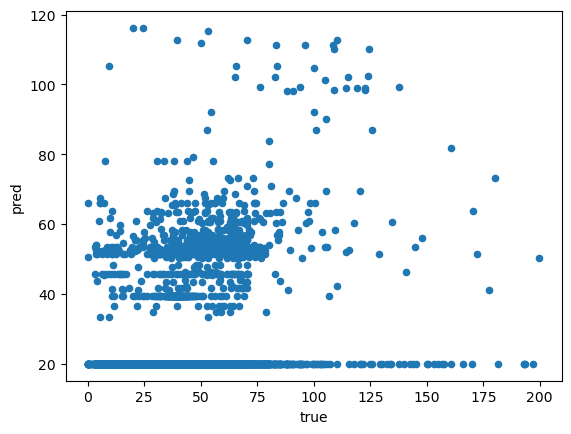

In [52]:
y_test_series = pd.Series(y_test.squeeze())
# squeeze() removes single-dimensional entries from the shape of an array, converting them to Series objects directly
# y_predict_series = pd.Series(y_predict)

print(y_test_series)
print(y_predict)
data = {'true': y_test_series, 'pred': y_predict}
results = pd.DataFrame(data)

results.plot(kind = 'scatter', x='true', y= 'pred')

# 6 Feature Engineering <a id='feature_eng'></a>

[.Back to top](#table_of_contents)

In [53]:
texi_grouped_by_region_df.head()

,PULocationID,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hr,trip_distance,total_amount,Count_No_Transactions
0,1,2019-01-01,2019,1,1,2,0.0,21.800,1
1,1,2019-01-01,2019,1,1,5,0.0,87.300,1
2,1,2019-01-01,2019,1,1,6,0.0,80.300,1
3,1,2019-01-01,2019,1,1,8,0.0,128.580,2
4,1,2019-01-01,2019,1,1,10,16.9,43.245,4


In [54]:
data_with_new_feature = texi_grouped_by_region_df.copy()

In [55]:
data_with_new_feature['transaction_weekday'] = data_with_new_feature['transaction_date'].dt.weekday

In [56]:
data_with_new_feature['transaction_weekday'].unique()

array([1, 2, 3, 4, 5, 6, 0])

In [57]:
data_with_new_feature['weekend'] = data_with_new_feature['transaction_weekday'].apply(lambda x:True if x==5 or x==6 else False )

In [58]:
data_with_new_feature.head()

,PULocationID,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hr,trip_distance,total_amount,Count_No_Transactions,transaction_weekday,weekend
0,1,2019-01-01,2019,1,1,2,0.0,21.800,1,1,False
1,1,2019-01-01,2019,1,1,5,0.0,87.300,1,1,False
2,1,2019-01-01,2019,1,1,6,0.0,80.300,1,1,False
3,1,2019-01-01,2019,1,1,8,0.0,128.580,2,1,False
4,1,2019-01-01,2019,1,1,10,16.9,43.245,4,1,False


In [59]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal =  USFederalHolidayCalendar()
holidays = cal.holidays(start = '2018',end='2020').date
data_with_new_feature['is_holiday'] = data_with_new_feature['transaction_weekday'].isin(holidays)


In [60]:
data_with_new_feature.head()

,PULocationID,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hr,trip_distance,total_amount,Count_No_Transactions,transaction_weekday,weekend,is_holiday
0,1,2019-01-01,2019,1,1,2,0.0,21.800,1,1,False,False
1,1,2019-01-01,2019,1,1,5,0.0,87.300,1,1,False,False
2,1,2019-01-01,2019,1,1,6,0.0,80.300,1,1,False,False
3,1,2019-01-01,2019,1,1,8,0.0,128.580,2,1,False,False
4,1,2019-01-01,2019,1,1,10,16.9,43.245,4,1,False,False


### Geographic information

In [61]:
zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')
zone_lookup = zone_lookup[['LocationID','Borough']]
zone_lookup['LocationID'] = zone_lookup['LocationID'].astype(str) 
zone_lookup.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [62]:
data_with_new_feature = data_with_new_feature.merge(zone_lookup,left_on = 'PULocationID',right_on = 'LocationID', how='inner')

In [63]:
data_with_new_feature.head()

,PULocationID,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hr,trip_distance,total_amount,Count_No_Transactions,transaction_weekday,weekend,is_holiday,LocationID,Borough
0,1,2019-01-01,2019,1,1,2,0.0,21.800,1,1,False,False,1,EWR
1,1,2019-01-01,2019,1,1,5,0.0,87.300,1,1,False,False,1,EWR
2,1,2019-01-01,2019,1,1,6,0.0,80.300,1,1,False,False,1,EWR
3,1,2019-01-01,2019,1,1,8,0.0,128.580,2,1,False,False,1,EWR
4,1,2019-01-01,2019,1,1,10,16.9,43.245,4,1,False,False,1,EWR


In [64]:
data_with_new_feature['Borough'].value_counts()

Borough
Manhattan        45309
Brooklyn         23632
Queens           21911
Bronx             9584
Unknown            744
Staten Island      302
EWR                270
Name: count, dtype: int64

# Modeling 


In [86]:
data_for_modeling = data_with_new_feature.copy().drop('transaction_date',axis=1) 

In [87]:
data_for_modeling.dtypes

PULocationID              object
transaction_year           int32
transaction_month          int32
transaction_day            int32
transaction_hr             int32
trip_distance            float64
total_amount             float64
Count_No_Transactions      int64
transaction_weekday        int32
weekend                     bool
is_holiday                  bool
LocationID                object
Borough                   object
dtype: object

In [88]:
cat_cols = [col for col in data_for_modeling.columns if data_for_modeling[col].dtypes =='object'] 

In [89]:
cat_cols

['PULocationID', 'LocationID', 'Borough']

In [102]:
num_cols = [col for col in data_for_modeling.columns if col not in cat_cols and col !='total_amount'] 

In [103]:
num_cols

['transaction_year',
 'transaction_month',
 'transaction_day',
 'transaction_hr',
 'trip_distance',
 'Count_No_Transactions',
 'transaction_weekday',
 'weekend',
 'is_holiday']

In [104]:
target_col = 'total_amount'

In [105]:
input_cols = cat_cols + num_cols

In [107]:
X = data_for_modeling[input_cols]
y = data_for_modeling[target_col]

In [108]:
X = pd.get_dummies(X)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,random_state= 42)

# Model Training

In [123]:
model = DecisionTreeRegressor(max_depth=10)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [124]:
model_creatd = model
y_predict = model.predict(X_test)
print(y_predict.shape)

(30739,)


In [125]:
print('mean_absolute_error',mean_absolute_error(y_test,y_predict))
print('mean_squared_error',mean_squared_error(y_test,y_predict))
print('root_mean_squared_error',sqrt(mean_absolute_error(y_test,y_predict)))
print('r2',r2_score(y_test,y_predict))

mean_absolute_error 3.3890263750397245
mean_squared_error 67.0082616859994
root_mean_squared_error 1.8409308447195198
r2 0.7603002906731939


<Axes: xlabel='true', ylabel='pred'>

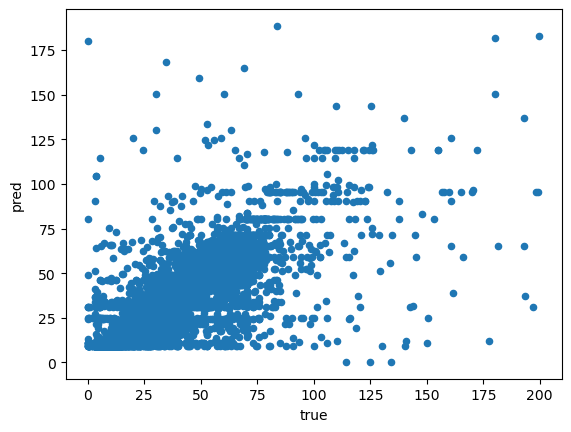

In [115]:
y_test_series = pd.Series(y_test.squeeze())
data = {'true': y_test_series, 'pred': y_predict}
results = pd.DataFrame(data)

results.plot(kind = 'scatter', x='true', y= 'pred')


In [116]:
X_train.shape

(71722, 542)

### 7.2 Random forest

In [119]:
from sklearn.ensemble import RandomForestRegressor

In [126]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [127]:
model_creatd = model
y_predict = model.predict(X_test)
print(y_predict.shape)

(30739,)


In [128]:
print('mean_absolute_error',mean_absolute_error(y_test,y_predict))
print('mean_squared_error',mean_squared_error(y_test,y_predict))
print('root_mean_squared_error',sqrt(mean_absolute_error(y_test,y_predict)))
print('r2',r2_score(y_test,y_predict))

mean_absolute_error 2.8894847241170853
mean_squared_error 55.84483516041445
root_mean_squared_error 1.6998484415138562
r2 0.8002337261324362


### 7.3 GradientBoosing Techniques

In [129]:
from sklearn.ensemble import GradientBoostingRegressor

In [130]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [131]:
model_creatd = model
y_predict = model.predict(X_test)
print(y_predict.shape)

(30739,)


In [132]:
print('mean_absolute_error',mean_absolute_error(y_test,y_predict))
print('mean_squared_error',mean_squared_error(y_test,y_predict))
print('root_mean_squared_error',sqrt(mean_absolute_error(y_test,y_predict)))
print('r2',r2_score(y_test,y_predict))

mean_absolute_error 3.272499014286235
mean_squared_error 55.669104360272684
root_mean_squared_error 1.8090049790661813
r2 0.8008623444647716
